In [5]:
from functions.embedding_quality import embedding_quality
from functions.plot_embedding import plot_embed

import openTSNE
from openTSNE import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load Tasic et al. data
tasic_colors = np.load('data/tasic/tasic-colors.npy')
tasic_pca50 = np.load('data/tasic/tasic-pca50.npy')
tasic_ttypes = np.load('data/tasic/tasic-ttypes.npy')

tasic_pca2 = tasic_pca50[:, :2]
tasic_pca2_scaled = tasic_pca2 / tasic_pca2[:,0].std()
tasic_pca2_scaled_eval = embedding_quality(tasic_pca2_scaled, tasic_pca50, tasic_ttypes)

Standard deviation of embedding is greater than 0.0001. Initial embeddings with high variance may have display poor convergence.
/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none", rasterized=rasterized)


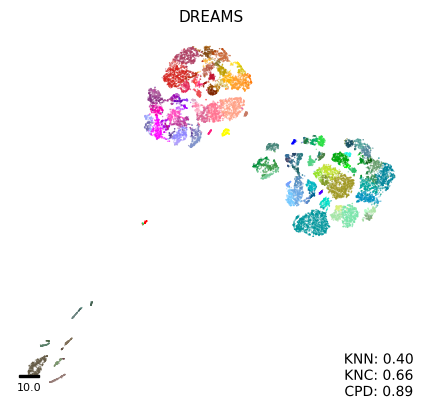

In [10]:
# Perform DREAMS
embedder = TSNE(initialization=tasic_pca2_scaled, regularization=True, reg_lambda=0.1, reg_embedding=tasic_pca2_scaled)
embd = embedder.fit(tasic_pca50)
eval = embedding_quality(embd, tasic_pca50, tasic_ttypes)
plot_embed(embd, eval, tasic_colors, title=f"DREAMS", add_scale_plot=True)

Standard deviation of embedding is greater than 0.0001. Initial embeddings with high variance may have display poor convergence.
/gpfs01/berens/user/nkury/tsne_pca/plot_embedding.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(*emb.T, c=c, alpha=alpha, s=s, cmap="tab10", edgecolor="none", rasterized=rasterized)


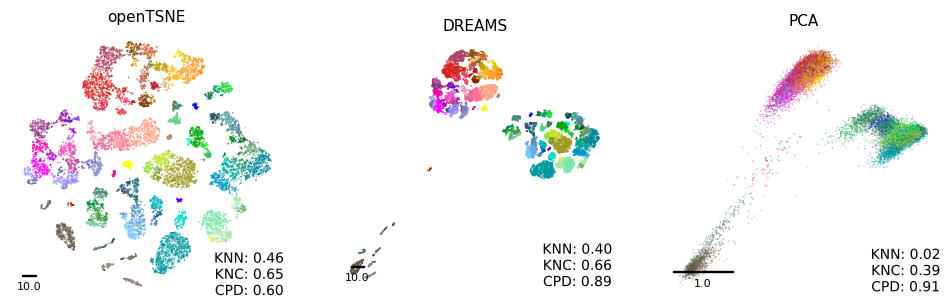

In [13]:
embedder_default = TSNE(initialization=tasic_pca2_scaled, regularization=False)
embd_default = embedder_default.fit(tasic_pca50)
eval_default = embedding_quality(embd_default, tasic_pca50, tasic_ttypes)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
plot_embed(embd_default, eval_default, tasic_colors, title=f"openTSNE", add_scale_plot=True, ax=ax[0])
plot_embed(embd, eval, tasic_colors, title=f"DREAMS", add_scale_plot=True, ax=ax[1])
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, title=f"PCA", add_scale_plot=True, ax=ax[2])